<a href="https://colab.research.google.com/github/nbeeeel/CodeClause_Stock_Prediction/blob/main/Time_Series_Stock_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Packages**

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

In [4]:
from pandas_datareader import data, wb
from sklearn.preprocessing import MinMaxScaler

import datetime
%matplotlib inline

In [5]:
import plotly.io as pio
pio.renderers.default="colab"

#**Downloading the dataset**
**Setting Up the period duration for the dataset we want to download**


**In this stock price Exploratory Data Analysis we will make use of stock data for six banks for the specified duration**

**Below are the bank names for which we will download the data**


*   Bank Of America - BAC
*   Citi Group - C
*   Goldman Sachs - GS
*   JPMorgan Chase - JPM
*   Morgan Stanley - MS
*   Wells Fargo - WFC





In [6]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime.now()

**Passing in the Acronyms for the banks data we want to download from "stooq".For downloading other time series dataset visit [This Dataset Link!!](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)**

In [7]:
df=data.DataReader(["BAC","C","GS","JPM","MS","WFC"],'stooq',start,end)

**Converting the dataframe to pickle and then reading the pickle file--- Optional**

In [6]:
df.to_pickle('/content/banks.pickle',compression='infer',protocol=5)

In [7]:
df=pd.read_pickle('/content/banks.pickle')

In [8]:
df.head()

Attributes    Close                                                  High  \
Symbols         BAC        C       GS      JPM       MS      WFC      BAC   
Date                                                                        
2006-01-03  39.6217  407.891  105.883  28.9771  38.2361  22.9581  39.7023   
2006-01-04  39.2004  400.354  104.432  28.5626  38.2675  22.6917  39.7592   
2006-01-05  39.2525  402.321  104.394  28.6520  38.3715  22.6690  39.4126   
2006-01-06  39.1917  402.321  105.855  28.8543  38.4108  22.7983  39.4774   
2006-01-09  39.2181  400.432  107.128  29.3229  38.8120  22.7983  39.5294   

Attributes                             ...     Open                    \
Symbols           C       GS      JPM  ...       GS      JPM       MS   
Date                                   ...                              
2006-01-03  408.615  106.354  29.0970  ...  104.109  28.7148  37.4934   
2006-01-04  406.325  105.922  28.9428  ...  104.609  28.6824  38.4971   
2006-01-05  403.663  104.599  28.7030  ...  103.531  28.5556  38.2675   
2006-01-06  404.641  106.187  29.0125  ...  104.579  28.7846  38.5432   
2006-01-09  403.329  107.323  29.3593  ...  105.560  28.7522  38.4470   

Attributes                 Volume                                            \
Symbols         WFC           BAC             C            GS           JPM   
Date                                                                          
2006-01-03  22.7430  1.936396e+07  1.858097e+06  7.508235e+06  1.780695e+07   
2006-01-04  22.8831  2.110031e+07  2.260921e+06  5.917173e+06  1.871252e+07   
2006-01-05  22.6690  1.761312e+07  1.371893e+06  4.521468e+06  1.118271e+07   
2006-01-06  22.7302  1.496529e+07  1.655812e+06  5.257604e+06  1.104151e+07   
2006-01-09  22.7983  1.855918e+07  2.031072e+06  5.749209e+06  2.298942e+07   

Attributes                              
Symbols               MS           WFC  
Date                                    
2006-01-03  6.806387e+06  1.530724e+07  
2006-01-04  1.009857e+07  1.510382e+07  
2006-01-05  7.313990e+06  1.407726e+07  
2006-01-06  8.721337e+06  1.167705e+07  
2006-01-09  5.246244e+06  7.808415e+06  

[5 rows x 30 columns]

#**Exploratory Data Analysis**

**The data is MultiIndex Heirarchial DataFrame. Below are the data attributes for each of the respective bank stocks including Close, High and Low's.** 

In [9]:
df.columns

MultiIndex([( 'Close', 'BAC'),
            ( 'Close',   'C'),
            ( 'Close',  'GS'),
            ( 'Close', 'JPM'),
            ( 'Close',  'MS'),
            ( 'Close', 'WFC'),
            (  'High', 'BAC'),
            (  'High',   'C'),
            (  'High',  'GS'),
            (  'High', 'JPM'),
            (  'High',  'MS'),
            (  'High', 'WFC'),
            (   'Low', 'BAC'),
            (   'Low',   'C'),
            (   'Low',  'GS'),
            (   'Low', 'JPM'),
            (   'Low',  'MS'),
            (   'Low', 'WFC'),
            (  'Open', 'BAC'),
            (  'Open',   'C'),
            (  'Open',  'GS'),
            (  'Open', 'JPM'),
            (  'Open',  'MS'),
            (  'Open', 'WFC'),
            ('Volume', 'BAC'),
            ('Volume',   'C'),
            ('Volume',  'GS'),
            ('Volume', 'JPM'),
            ('Volume',  'MS'),
            ('Volume', 'WFC')],
           names=['Attributes', 'Symbols'])

In [10]:
df.index.names

FrozenList(['Date'])

**The Close section is iterated to find the maximum closing stock value for each of the respective bank for the data duration**

In [11]:
df.xs(key='Close',axis=1,level='Attributes').max()

Symbols
BAC     48.2567
C      466.8120
GS     410.7930
JPM    166.5240
MS     105.7610
WFC     57.9642
dtype: float64

In [12]:
df.Close.head()

Symbols,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,39.6217,407.891,105.883,28.9771,38.2361,22.9581
2006-01-04,39.2004,400.354,104.432,28.5626,38.2675,22.6917
2006-01-05,39.2525,402.321,104.394,28.6520,38.3715,22.6690
2006-01-06,39.1917,402.321,105.855,28.8543,38.4108,22.7983
2006-01-09,39.2181,400.432,107.128,29.3229,38.8120,22.7983


In [13]:
returns = pd.DataFrame()

**Next we will apply the percentage change method from the pandas library in order to get an idea about the percentage change between the values with time. While providing us information about the percentage negative or positive trend. The percentage change is calculated by finding the difference between two values and then dividing the resultant by the first value.**

**Percentage_Change= Division(Diff(value1,value2))**

In [14]:
returns=df.xs(key='Close',axis=1,level='Attributes').pct_change()

In [15]:
returns.head()

Symbols,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [16]:
returns=returns.rename(columns={"BAC":"BAC return","C":"C return","GS":"GS return","JPM":"JPM return","MS":"MS return","WFC":"WFC return"})

In [17]:
returns.head(50)

Symbols,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000
2006-01-10,-0.008363,0.003129,0.012443,0.001477,0.000634,-0.000868
2006-01-11,-0.002322,0.009064,-0.000452,-0.000637,0.005835,0.005242
2006-01-12,-0.006606,0.000992,0.002251,-0.018547,-0.001556,-0.011508
2006-01-13,0.000000,-0.002245,0.007676,-0.000646,-0.001636,0.005452


#**Visualizing**

**Visualizing the trends from the data. Here we can see the results from C deviate from the rest. This is because of the severe crisis in 2008. More detailed analysis on the stock behaviour will be seen in the other visualizations**

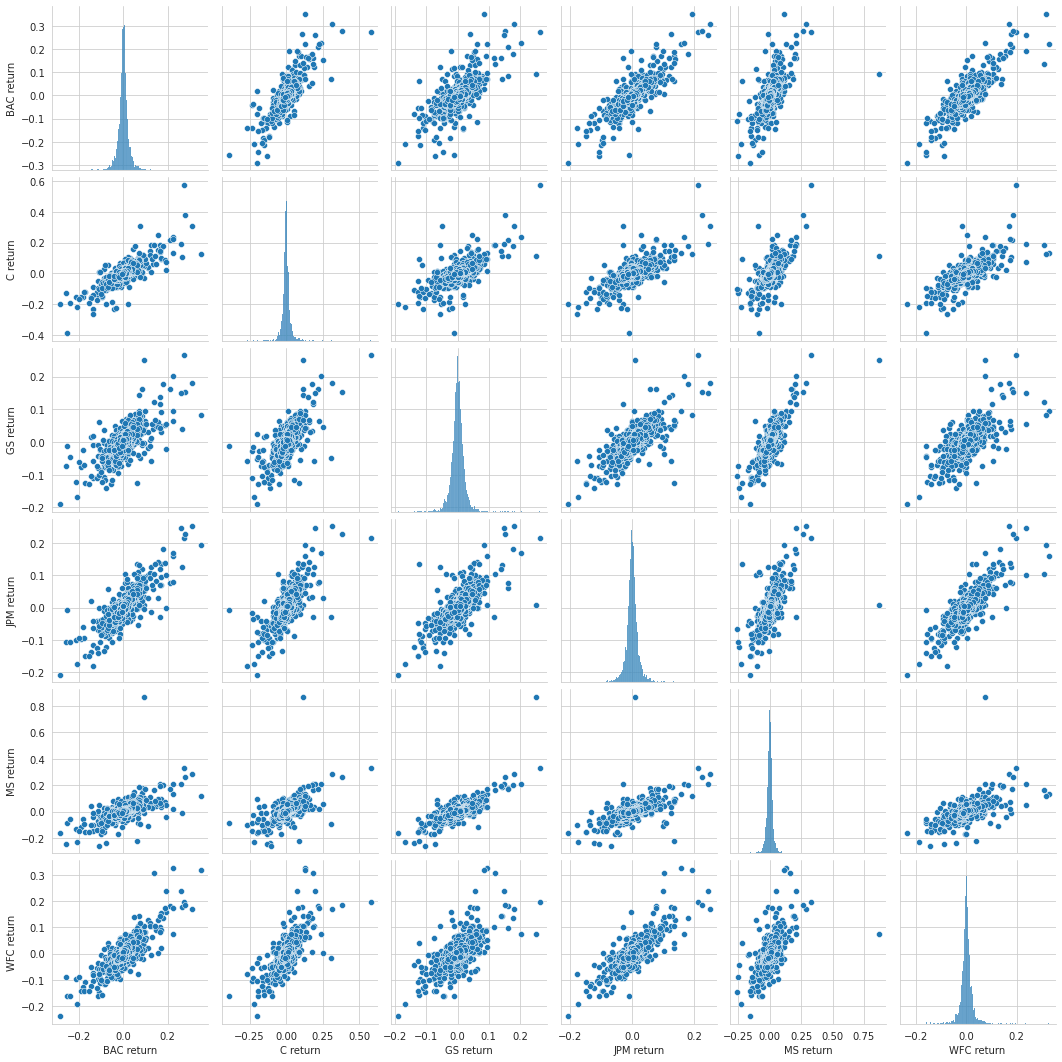

In [18]:
sns.pairplot(returns[1:])

**Now we will see the date for the min and max closing value for the stock prices of different Banks**

In [19]:
returns.idxmin()

Symbols
BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [20]:
returns.idxmax()

Symbols
BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

**The min max results show the short time difference between closing stock price fluctuations for each of the corresponding banks. Now the below standard deviation figures further clear the most unpredictibility in Citi Bank Closing Stocks.**

In [21]:
returns.std()

Symbols
BAC return    0.031043
C return      0.032801
GS return     0.023020
JPM return    0.024232
MS return     0.031820
WFC return    0.026772
dtype: float64

**The below distribution plot for MS return for one year suggest scattered data points, which can also be seen in the standard deviation near Citi Bank. However there is still a  low predictivity curve**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



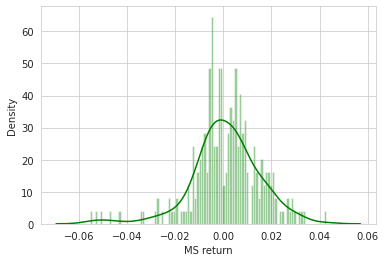

In [24]:
sns.distplot(returns.loc['2017-05-01':'2018-04-30']['MS return'],color='green',bins=100)

**The below distribution of Citi Bank for a period of one year suggests high unpredictibility because of the extreme highs and lows in the stock's closing points.**

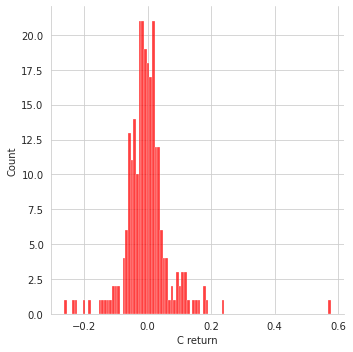

In [25]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C return'],color='red',bins=100)

In [26]:
df['Close']['BAC']

Date
2006-01-03    39.6217
2006-01-04    39.2004
2006-01-05    39.2525
2006-01-06    39.1917
2006-01-09    39.2181
               ...   
2023-02-10    35.5800
2023-02-13    35.6500
2023-02-14    35.6200
2023-02-15    35.5600
2023-02-16    35.2800
Name: BAC, Length: 4311, dtype: float64

**Now we plot the Closing Stock Price against all the banks to see the pattern and relative uniformity and predictible behaviour. We see that GS banks show a different pattern then the rest of the banks. The tumultous nature of the Citi bank's graph can be seen as settled after 2010 with fewer ups and downs just like the rest. However, the GS bank's closing rate graph suggests high non-uniformity and unpredictibility**

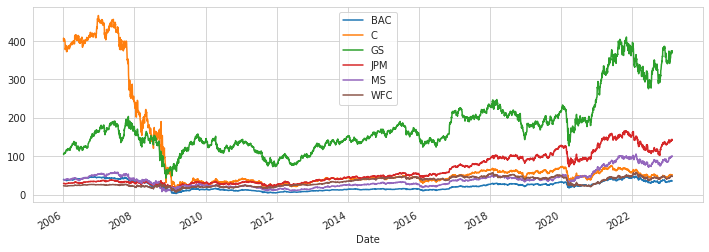

In [22]:
tickers=['BAC','C','GS','JPM','MS','WFC']
for tick in tickers:
  df['Close'][tick].plot(figsize=(12,4),label=tick)
plt.legend()

**Optional Approach---Alternative Method for plotting with iterating via for loop.**

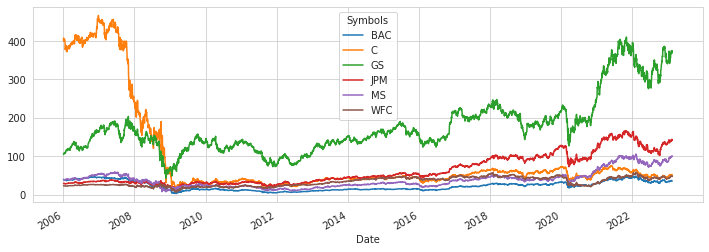

In [27]:
df.xs(key='Close',axis=1,level='Attributes').plot(figsize=(12,4))

**Now we will plot the moving average for BAC Closing Price. The moving average makes use of a particular time window, through which it determines the trends and direction of a particular stock. Moving averages take the data point for the specified time for instance a 30 day window or a 50 day window and then sums up the datapoints for that particular instance and then divides each data point with that sum.**

Moving_Average =>  

*  Let window_size=>n=30
*  data_points=[1,2,2.3,..30]
*  prev_number=0
*  new_data_points=[]
*  for i in range(n):
*    new=prev_number+data_points[i]
*  for j in data_points:
*     p=new/data_points[1]
*     new_data_points.append[p]  




    



**The moving average for Closing values of BAC stock prices smooths out the unaveraged values and provide a more general understanding as seen in the below graph**

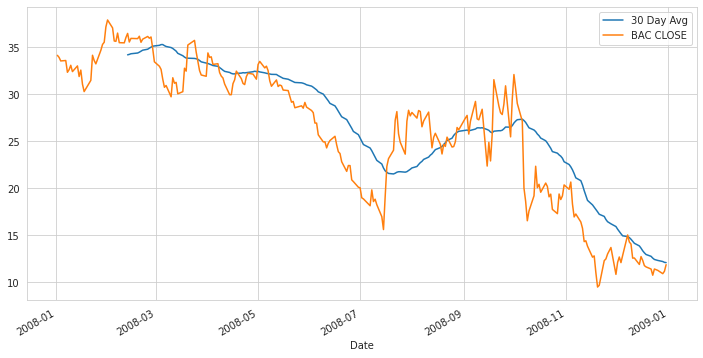

In [28]:
plt.figure(figsize=(12,6))
df['Close']['BAC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close']['BAC'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [29]:
df.xs(key='Close',axis=1,level='Attributes').iplot()


**Now using the confusion matrix we evaluate the correlation between the trends of each of the banks, in this way we can generalize the external factors influencing the similar behaviours in stock prices.**

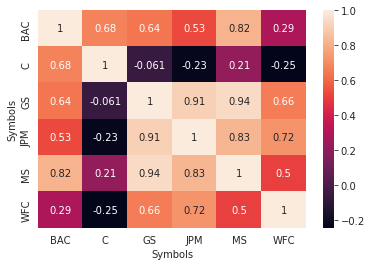

In [23]:
sns.heatmap(df.xs(key='Close',axis=1,level='Attributes').corr(),annot=True)

**Below is the clustered heatmap of correlated features. Here we can see the high correlated banks are clustered in a hierarchy**

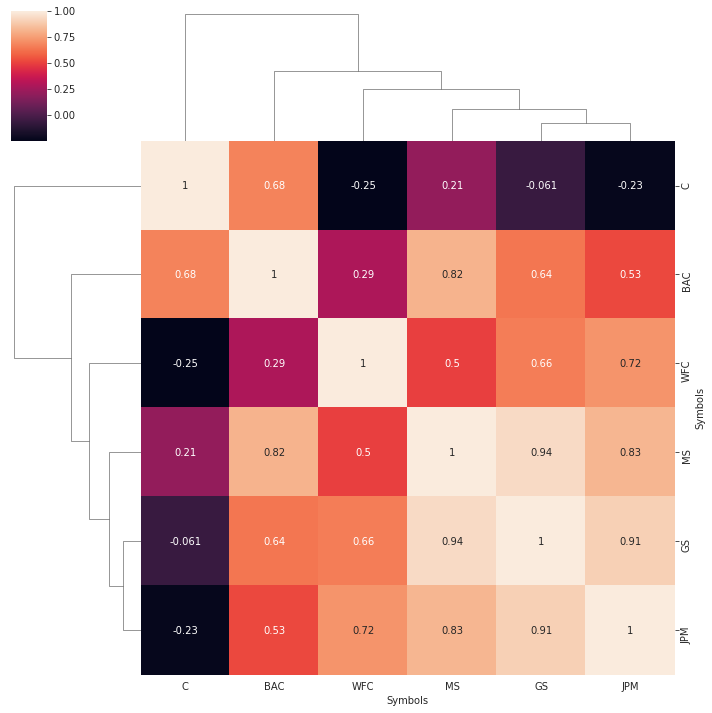

In [30]:
sns.clustermap(df.xs(key='Close',axis=1,level='Attributes').corr(),annot=True)

In [31]:
close_corr=df.xs(key='Close',axis=1,level='Attributes').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')


In [32]:
BAC_r=pd.DataFrame()
Attr=['Open','High','Low','Close']
for att in Attr:
  BAC_r['BAC-'+att]=df[att]['BAC'].loc['2017-01-01':'2018-04-30']

In [33]:
BAC_r.head()

,BAC-Open,BAC-High,BAC-Low,BAC-Close
Date,,,,
2017-01-03,19.9449,20.0157,19.5933,19.8831
2017-01-04,20.0510,20.2630,19.9449,20.2533
2017-01-05,20.1412,20.2346,19.7210,20.0157
2017-01-06,20.1031,20.1678,19.9086,20.0157
2017-01-09,19.8672,20.0411,19.7701,19.8998


**Here we used candle map to visualize the rising and falling trend of BAC bank for one year. The green candles highlight the rise whilst the red candles mark the falling regions.**

In [34]:
BAC_r.iplot(kind='candle')

In [35]:
df['Close']['MS'].loc['2017-01-01':'2018-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [36]:
df['Close']['C'].loc['2017-01-01':'2018-01-01'].ta_plot(study='boll')

#**Preprocessing the data for feeding into the LSTM**

In [124]:
df_train=pd.DataFrame()

In [125]:
df_train['Close']=df['Close']['BAC']

In [126]:
dataset = df_train.values

In [127]:
training_data_len = int(np.ceil(len(dataset)*.95))

In [128]:
training_data_len

4096

In [129]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [131]:
len(scaled_data)

4311

In [132]:
scaled_data.shape

(4311, 1)

In [133]:
train_data = scaled_data[0:int(training_data_len), :]

In [134]:
x_train=[]
y_train=[]

In [135]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

[array([0.81069479, 0.80145863, 0.80260081, 0.8012679 , 0.80184666,
       0.79465592, 0.79267627, 0.7870574 , 0.7870574 , 0.778058  ,
       0.77708901, 0.77491424, 0.75738899, 0.75316881, 0.75837991,
       0.76546323, 0.77050114, 0.76862672, 0.76279301, 0.75818698,
       0.75299781, 0.74356872, 0.73708828, 0.74229719, 0.74438645,
       0.74774286, 0.75073535, 0.75243658, 0.74830409, 0.7567861 ,
       0.76046917, 0.76662515, 0.76604419, 0.76399877, 0.77377425,
       0.77915415, 0.78561267, 0.79039408, 0.78807024, 0.78341818,
       0.77508743, 0.77585912, 0.77624716, 0.78380402, 0.78544167,
       0.7824711 , 0.78985478, 0.78966185, 0.79558326, 0.79816579,
       0.80479531, 0.80735592, 0.80735592, 0.8012679 , 0.80903741,
       0.80369697, 0.80735592, 0.80589365, 0.79190019, 0.79022089])]
[0.7836111015502419]

[array([0.81069479, 0.80145863, 0.80260081, 0.8012679 , 0.80184666,
       0.79465592, 0.79267627, 0.7870574 , 0.7870574 , 0.778058  ,
       0.77708901, 0.77491424, 0.757

In [136]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [137]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [140]:
x_train.shape

(4036, 60, 1)

In [138]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [141]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4036/4036 [==============================] - 235s 58ms/step - loss: 4.7623e-04


#**Validating the Model**

In [143]:
test_data = scaled_data[training_data_len -60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

x_test =  np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))

7/7 [==============================] - 1s 47ms/step


**We got the root mean squared error of 0.7245 which is a very good indication of LSTM's ability to sort time series problems**

In [144]:
rmse

0.724532481834832

**Now we visualize the predictions and see how the predictions perform against the real-values**

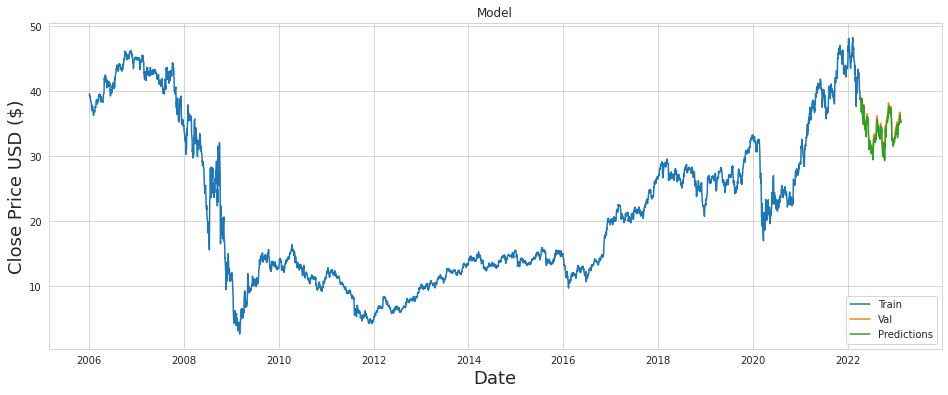

In [145]:
train = df_train[:training_data_len]
valid = df_train[training_data_len:]

valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

**The Predicted values and the real values can be compared in the below table**

In [146]:
valid

,Close,Predictions
Date,,
2022-04-11,38.8783,38.936584
2022-04-12,38.4659,38.801300
2022-04-13,38.1222,38.328133
2022-04-14,36.8946,37.976597
2022-04-18,38.1517,36.697052
...,...,...
2023-02-10,35.5800,35.243721
2023-02-13,35.6500,35.195854
2023-02-14,35.6200,35.331177


#**Thank You!**